In [9]:
%matplotlib inline

import os
import cmaps
import salem
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from pylab import rcParams
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib.font_manager as fm

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

print('python draw_g2_scatter.py')
print(data_path)
dir_man = DirMan(data_path)
dir_man.enter()
os.makedirs(f'{fig_path}/global_map_2', exist_ok=True)

shp = gpd.GeoDataFrame.from_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')

pd.set_option('display.max_columns', None)
# font = {'family': 'Times New Roman'}
font = {'family': 'Arial'}
mpl.rc('font', **font)

params = {'backend': 'ps',
          'axes.linewidth': 2,
          'grid.linewidth': 0.2,
          'legend.frameon': False,
          'xtick.direction': 'out',
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

font_properties = fm.FontProperties(weight='bold', size=25)

casename1 = 'bedrock_1'
path1 = f'{data_path}/cases/{casename1}/'
casename2 = 'bedrock_2'
path2 = f'{data_path}/cases/{casename2}/'
casename3 = 'bedrock_3'
path3 = f'{data_path}/cases/{casename3}/'

python draw_g2_scatter.py
/tera04/zhwei/xionghui/bedrock/run/500/
Entered /tera04/zhwei/xionghui/bedrock/run/500/


/tmp/ipykernel_3930984/3827409812.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


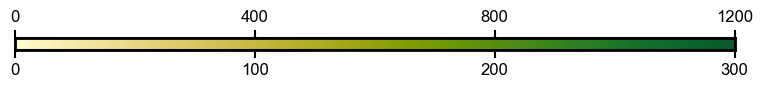

In [2]:
fig = plt.figure(figsize=(8, 4))  

cbar_ax = fig.add_axes([0.1, 0.3, 0.9, 0.03]) 

custom_ticks1 = [0, 100, 200, 300]  
custom_ticks2 = [0, 400, 800, 1200] 

norm = mpl.colors.Normalize(vmin=0, vmax=300) 
cmap = cmaps.cmocean_speed[:200]

cb = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=cmap,
    norm=norm,
    orientation='horizontal',
    ticks=custom_ticks1, 
    drawedges=False,
    spacing='uniform'
)


cb.ax.tick_params(labelsize=12, direction='out', width=1.5, length=6)
cb.ax.xaxis.set_ticks_position('bottom')  

cb_ax_bottom = cb.ax.twiny() 
cb_ax_bottom.set_xlim(0, 1200)  
cb_ax_bottom.set_xticks(custom_ticks2) 
cb_ax_bottom.tick_params(labelsize=12, direction='out', width=1.5, length=6)
# cb_ax_bottom.xaxis.set_ticks_position('top')  

cb.outline.set_visible(True)
cb.outline.set_edgecolor('#333333')
cb.outline.set_linewidth(1.5)

fig.tight_layout(pad=0)
plt.show()

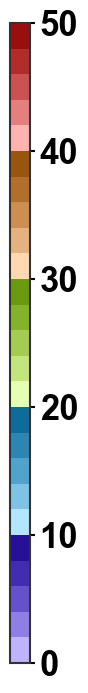

In [10]:
fig = plt.figure(figsize=(4, 8))  

cbar_ax1 = fig.add_axes([0.3, 0.1, 0.05, 0.8], frameon=True)  

custom_ticks1 = np.arange(0,60,10)
norm1 = mpl.colors.Normalize(vmin=0, vmax=50)  
cmap1 = cmaps.StepSeq25_r


cb1 = mpl.colorbar.ColorbarBase(
    cbar_ax1,
    cmap=cmap1,
    norm=norm1,
    orientation='vertical',
    ticks=custom_ticks1,
    drawedges=False,
    spacing='uniform'
)
cb1.ax.tick_params(labelsize=25, direction='out', width=1.5)
cb1.ax.yaxis.set_ticks_position('right')  
for label in cb1.ax.get_yticklabels():
    label.set_fontproperties(font_properties)  


cb1.outline.set_visible(True)
cb1.outline.set_edgecolor('#333333')
cb1.outline.set_linewidth(1.5)


# fig.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_3957178/1568496413.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


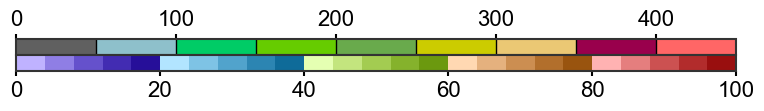

In [5]:
fig = plt.figure(figsize=(8, 4))  

cbar_ax1 = fig.add_axes([0.1, 0.34, 0.9, 0.04]) 
cbar_ax2 = fig.add_axes([0.1, 0.3, 0.9, 0.04]) 

custom_ticks1 = [0, 100, 200, 300, 400]
norm1 = mpl.colors.Normalize(vmin=0, vmax=450)  
rgb_list = ['#606060','#8ec0cb','#00CC66','#66CC00',
                                '#69aa4c','#CCCC00','#ebc874','#99004C','#FF6666']
cmap1 = colors.ListedColormap(rgb_list)

custom_ticks2 = [0, 20, 40, 60, 80, 100]
norm2 = mpl.colors.Normalize(vmin=0, vmax=100) 
cmap2 = cmaps.StepSeq25_r

cb1 = mpl.colorbar.ColorbarBase(
    cbar_ax1,
    cmap=cmap1,
    norm=norm1,
    orientation='horizontal',
    ticks=custom_ticks1,
    drawedges=True,
    spacing='uniform'
)
cb1.ax.tick_params(labelsize=16, direction='out', width=1.5)
cb1.ax.xaxis.set_ticks_position('top')  
for label in cb1.ax.get_yticklabels():
    label.set_fontproperties(font_properties)  

cb2 = mpl.colorbar.ColorbarBase(
    cbar_ax2,
    cmap=cmap2,
    norm=norm2,
    orientation='horizontal',
    ticks=custom_ticks2,
    drawedges=False,
    spacing='uniform'
)
cb2.ax.tick_params(labelsize=16, direction='out', width=1.5)
cb2.ax.xaxis.set_ticks_position('bottom')  
for label in cb2.ax.get_yticklabels():
    label.set_fontproperties(font_properties)  

cb1.outline.set_visible(True)
cb1.outline.set_edgecolor('#333333')
cb1.outline.set_linewidth(1.5)

cb2.outline.set_visible(True)
cb2.outline.set_edgecolor('#333333')
cb2.outline.set_linewidth(1.5)

# x_center = (0.6 + 0.03*2) / 2 
# y_top = 0.1 + 0.8 + 0.02  
# fig.text(x_center, y_top, "Bedrock \nwater storage\n capacity: \n$S_{bedrock}$ (mm)", 
#          fontsize=25, fontweight='bold', 
#          ha='center', va='bottom')
fig.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_3930984/1963680326.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


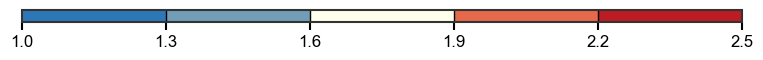

In [5]:
fig = plt.figure(figsize=(8, 4))  

cbar_ax = fig.add_axes([0.1, 0.3, 0.9, 0.03]) 

custom_ticks = [1, 1.3, 1.6, 1.9, 2.2, 2.5]  

norm = mpl.colors.Normalize(vmin=custom_ticks[0], vmax=custom_ticks[-1]) 
rgb_list = ['#2d77b9','#719db8','#ffffeb','#e5694a','#bd1c25']
cmap = colors.ListedColormap(rgb_list)

cb = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=cmap,
    norm=norm,
    orientation='horizontal',
    ticks=custom_ticks, 
    drawedges=True,
    spacing='uniform'
)


cb.ax.tick_params(labelsize=12, direction='out', width=1.5, length=6)
cb.ax.xaxis.set_ticks_position('bottom')  

cb.outline.set_visible(True)
cb.outline.set_edgecolor('#333333')
cb.outline.set_linewidth(1.5)

fig.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_3930984/2351214647.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


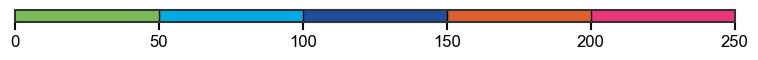

In [6]:
fig = plt.figure(figsize=(8, 4))  

cbar_ax = fig.add_axes([0.1, 0.3, 0.9, 0.03]) 

custom_ticks = [0, 50, 100, 150, 200, 250]  

norm = mpl.colors.Normalize(vmin=custom_ticks[0], vmax=custom_ticks[-1]) 
rgb_list = ['#79bc55','#00aae3','#1e4f9e','#dc5f30','#eb357b']
cmap = colors.ListedColormap(rgb_list)

cb = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=cmap,
    norm=norm,
    orientation='horizontal',
    ticks=custom_ticks, 
    drawedges=True,
    spacing='uniform'
)


cb.ax.tick_params(labelsize=12, direction='out', width=1.5, length=6)
cb.ax.xaxis.set_ticks_position('bottom')  

cb.outline.set_visible(True)
cb.outline.set_edgecolor('#333333')
cb.outline.set_linewidth(1.5)

fig.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_3930984/601791181.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


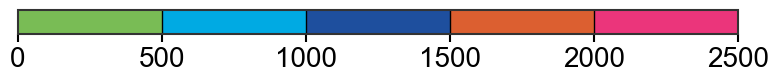

In [7]:
fig = plt.figure(figsize=(8, 4))  

cbar_ax = fig.add_axes([0.1, 0.3, 0.9, 0.06]) 

custom_ticks = [0, 500, 1000, 1500, 2000, 2500]  

norm = mpl.colors.Normalize(vmin=custom_ticks[0], vmax=custom_ticks[-1]) 
rgb_list = ['#79bc55','#00aae3','#1e4f9e','#dc5f30','#eb357b']
cmap = colors.ListedColormap(rgb_list)

cb = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=cmap,
    norm=norm,
    orientation='horizontal',
    ticks=custom_ticks, 
    drawedges=True,
    spacing='uniform'
)


cb.ax.tick_params(labelsize=20, direction='out', width=1.5, length=6)
cb.ax.xaxis.set_ticks_position('bottom')  

cb.outline.set_visible(True)
cb.outline.set_edgecolor('#333333')
cb.outline.set_linewidth(1.5)

fig.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_3930984/2644312301.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


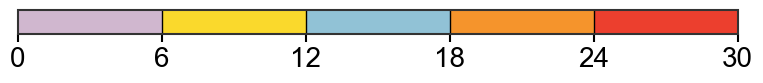

In [8]:
fig = plt.figure(figsize=(8, 4))  

cbar_ax = fig.add_axes([0.1, 0.3, 0.9, 0.06]) 

custom_ticks = [0, 6, 12, 18, 24, 30]  

norm = mpl.colors.Normalize(vmin=custom_ticks[0], vmax=custom_ticks[-1]) 
rgb_list = ['#d0b7cf','#fad92c','#91c2d6','#f5942c','#ec3f2e']
cmap = colors.ListedColormap(rgb_list)

cb = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=cmap,
    norm=norm,
    orientation='horizontal',
    ticks=custom_ticks, 
    drawedges=True,
    spacing='uniform'
)


cb.ax.tick_params(labelsize=20, direction='out', width=1.5, length=6)
cb.ax.xaxis.set_ticks_position('bottom')  

cb.outline.set_visible(True)
cb.outline.set_edgecolor('#333333')
cb.outline.set_linewidth(1.5)

fig.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_3930984/3110834632.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


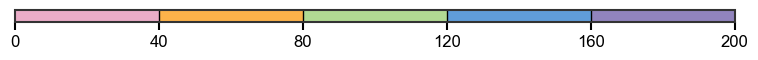

In [9]:
fig = plt.figure(figsize=(8, 4))  

cbar_ax = fig.add_axes([0.1, 0.3, 0.9, 0.03]) 

custom_ticks = [0, 40, 80, 120, 160, 200]  

norm = mpl.colors.Normalize(vmin=custom_ticks[0], vmax=custom_ticks[-1]) 
rgb_list = ['#eaadc8','#fcb24a','#b1da93','#609dda','#9184bd']
cmap = colors.ListedColormap(rgb_list)

cb = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=cmap,
    norm=norm,
    orientation='horizontal',
    ticks=custom_ticks, 
    drawedges=True,
    spacing='uniform'
)


cb.ax.tick_params(labelsize=12, direction='out', width=1.5, length=6)
cb.ax.xaxis.set_ticks_position('bottom')  

cb.outline.set_visible(True)
cb.outline.set_edgecolor('#333333')
cb.outline.set_linewidth(1.5)

fig.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_3930984/1652981560.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


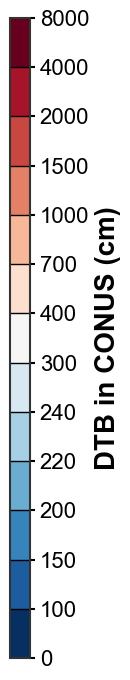

In [10]:
fig = plt.figure(figsize=(4, 8))  


cbar_ax1 = fig.add_axes([0.3, 0.1, 0.05, 0.8], frameon=True)  

custom_ticks1 = [0, 100, 150, 200, 220, 240, 300, 400, 700, 1000, 1500, 2000, 4000, 8000]

cmap = 'RdBu_r'

def define_colormap(level, cmap_name):
    cmap = plt.get_cmap(cmap_name)
    color = cmap(np.linspace(0, 1, len(level) - 1))
    cmap_custom = colors.ListedColormap(color)
    cmap_custom.set_under(cmap(0))
    cmap_custom.set_over(color[-1])
    norm = colors.BoundaryNorm(level, cmap_custom.N)
    return cmap_custom, norm

cmap1, norm1= define_colormap(custom_ticks1,cmap)

cb1 = mpl.colorbar.ColorbarBase(
    cbar_ax1,
    cmap=cmap1,
    norm=norm1,
    orientation='vertical',
    ticks=custom_ticks1,
    drawedges=True,
    spacing='uniform'
)

cb1.ax.tick_params(labelsize=16, direction='out', width=1.5)
cb1.ax.yaxis.set_ticks_position('right')  

cb1.outline.set_visible(True)
cb1.outline.set_edgecolor('#333333')
cb1.outline.set_linewidth(1.5)
cb1.set_label(f"DTB in CONUS (cm)", fontsize=20, fontweight='bold')

fig.tight_layout(pad=0)
plt.show()